In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import fbeta_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

### This work fits a support vector model to the data
### and plots the validation curve to visualize its score. 

### Import our data
inpath = "C:/Users/Davis/Downloads/scaledmagicdata3.csv"
df = pd.read_csv(inpath)


### Separate target and convert the data to a numpy array (sklearn's PCA likes numpy arrays, and who doesn't?)
Y = df.pop("Class")
X = np.array(df)

### Principal component analysis
pca = PCA(n_components = 7) 
X_t = pca.fit_transform(X)

### See our explained varance
print(pca.explained_variance_ratio_)

[0.47483296 0.3084368  0.09145554 0.04854124 0.02764439 0.01660827
 0.0141771 ]


In [104]:
### split into train and test data, with ~1/3 of data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 11)

### Now we train the SVM
svc = SVC()
svc.fit(X_train, y_train)

SVC()

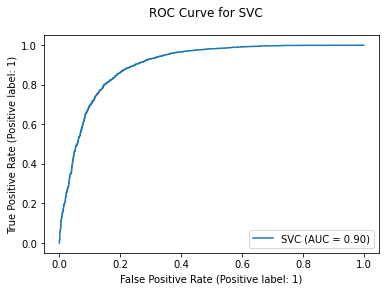

In [132]:
### Plot ROC Curve and see what's what
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
svc_disp.figure_.suptitle("ROC Curve for SVC")
plt.savefig(r'C:/Users/Davis/Desktop/DevComPresentationMaterials/ROCexample.png', dpi = 300)
plt.show()

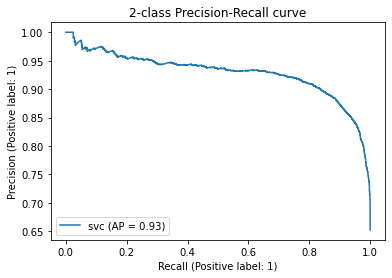

In [91]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    svc, X_test, y_test, name="svc"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [92]:
from sklearn.metrics import confusion_matrix

y_p = svc.predict(X_test)

print(confusion_matrix(y_test, y_p))

[[1336  845]
 [ 143 3953]]


In [103]:
from sklearn.metrics import confusion_matrix

y_p = svc.predict(X_test)

print(confusion_matrix(y_test, y_p))
print(fbeta_score(y_test, y_p, beta = 0.5))

[[1336  845]
 [ 143 3953]]
0.848720371006527


In [82]:
from sklearn.metrics import confusion_matrix

y_p = svc.predict(X_test)

print(confusion_matrix(y_test, y_p))

[[1286  895]
 [ 132 3964]]


In [93]:
from sklearn.metrics import f1_score

f1_score(y_test, y_p)

0.8889138745221498

In [2]:
from sklearn.model_selection import validation_curve
param_range = np.logspace(-3, -0.01, 10)
train_scores, test_scores = validation_curve(
    SVC(),
    X,
    Y,
    param_name="gamma",
    param_range=param_range,
    scoring="roc_auc",
    n_jobs=2,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)



KeyboardInterrupt: 

In [4]:
from sklearn.model_selection import validation_curve
param_range = np.logspace(-3, 2, 6)
train_scores, test_scores = validation_curve(
    SVC(),
    X,
    Y,
    param_name="gamma",
    param_range=param_range,
    scoring="roc_auc",
    n_jobs=4,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

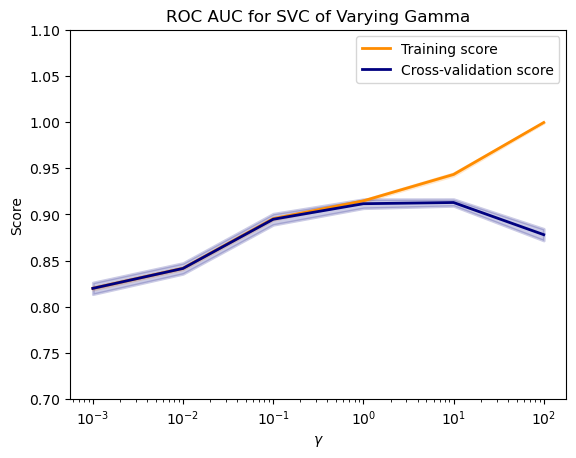

In [5]:
plt.title("ROC AUC for SVC of Varying Gamma")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.7, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
fname = r'C:/Users/Davis/Desktop/DevComPresentationMaterials/rocaucsvcbiggamma.png'
plt.savefig(fname, dpi = 300)
plt.show()

In [110]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',